# Setting up example specification file

In [2]:
import pandas as pd
import pyproj
import os
os.listdir('../data/')

['Near Sea Buoy Data - Merged With Coordinates.csv',
 '.DS_Store',
 'iabp',
 'nsidc_agg']

In [6]:
df = pd.read_csv('../data/Near Sea Buoy Data - Merged With Coordinates.csv', parse_dates=['Start_Time'])

In [13]:
df.groupby('Start_Time').count().sort_values('Buoy_ID')[::-1]

,Buoy_ID,End_Time,Start_Lat,Start_Lon,End_Lat,End_Lon
Start_Time,,,,,,
2015-07-01 00:00:00,8,8,8,8,8,8
2016-08-01 00:00:00,8,8,8,8,8,8
2015-10-01 00:00:00,7,7,7,7,7,7
2014-07-01 00:00:00,6,6,6,6,6,6
2011-10-01 00:00:00,4,4,4,4,4,4
...,...,...,...,...,...,...
2015-08-03 22:30:00,1,1,1,1,1,1
2015-07-29 00:00:00,1,1,1,1,1,1
2015-07-22 15:00:00,1,1,1,1,1,1


In [16]:
df_subset = df.loc[df.Start_Time == '2015-07-01 00:00:00']

In [15]:
import proplot as pplt

/opt/miniconda3/envs/cal-val/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


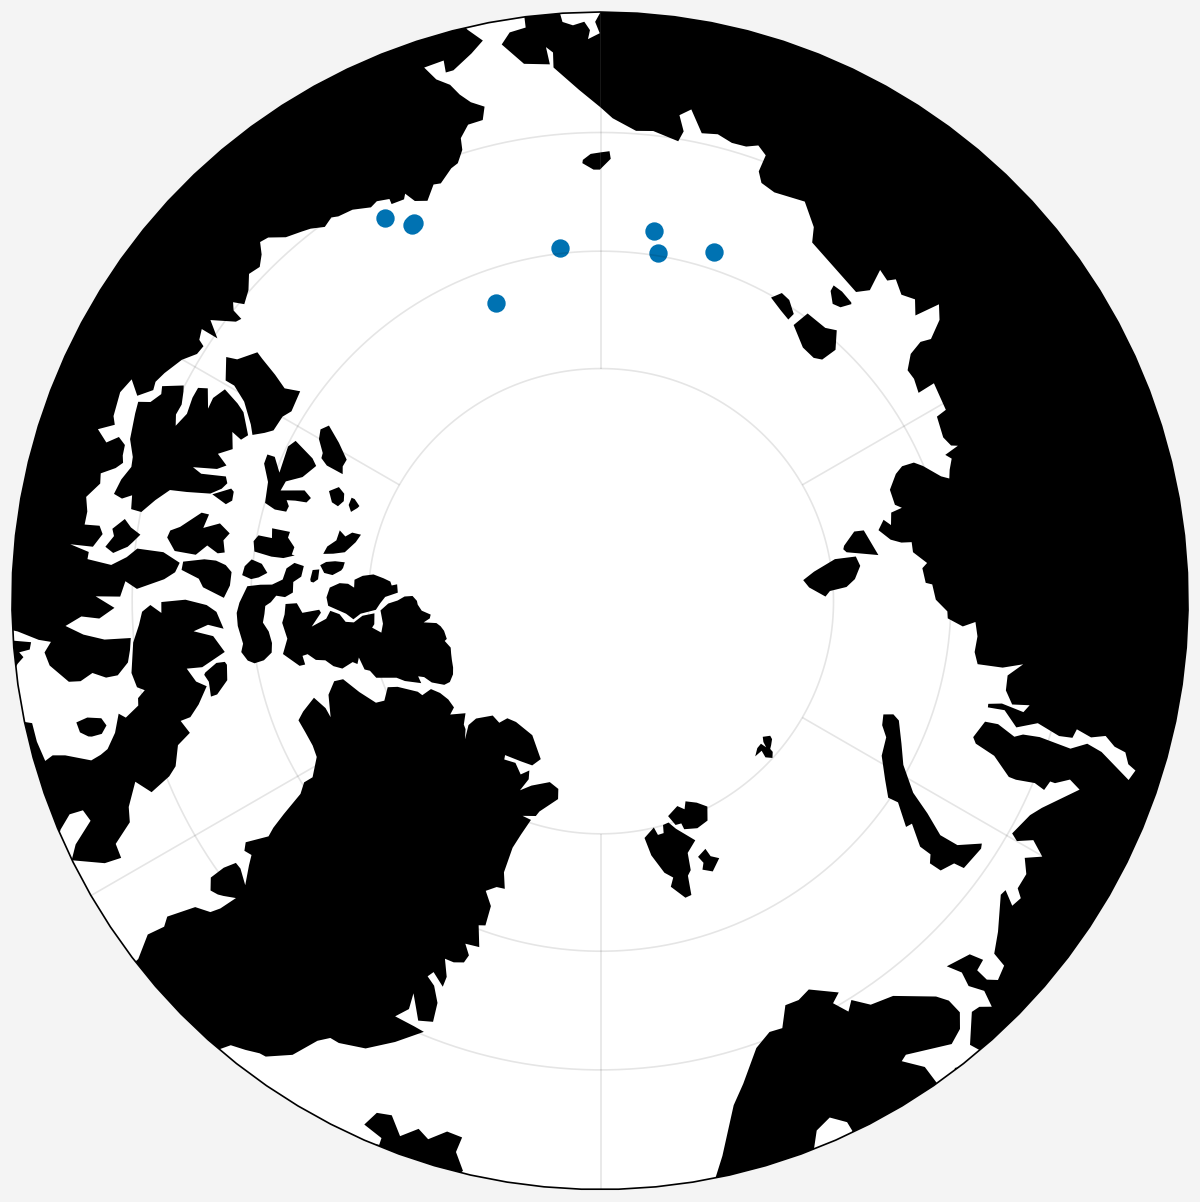

In [18]:
import cartopy.crs as ccrs
fig, ax = pplt.subplots(proj='npstere', width=6)
ax.format(land=True, boundinglat=65)
ax.scatter(df_subset.Start_Lon.values, df_subset.Start_Lat.values, transform=ccrs.PlateCarree())

In [28]:
crs0 = pyproj.CRS('WGS84')
crs1 = pyproj.CRS('epsg:3413')
transformer_ll_to_xy = pyproj.Transformer.from_crs(crs0, crs_to=crs1, always_xy=True)
transformer_xy_to_ll = pyproj.Transformer.from_crs(crs1, crs_to=crs0, always_xy=True)
lons = df_subset[['Start_Lon', 'End_Lon']].max(axis=1)
lats = df_subset[['Start_Lat', 'End_Lat']].max(axis=1)

x0, y0 = transformer_ll_to_xy.transform(lons, lats)
    


In [30]:
margin = 100e3
left = min(x0) - margin
right = max(x0) + margin
bottom = min(y0) - margin
top = max(y0) + margin

lon0, lat0 = transformer_xy_to_ll.transform(0.5*(left + right), 0.5*(bottom + top))

/opt/miniconda3/envs/cal-val/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


<a list of 1 Line2D objects>

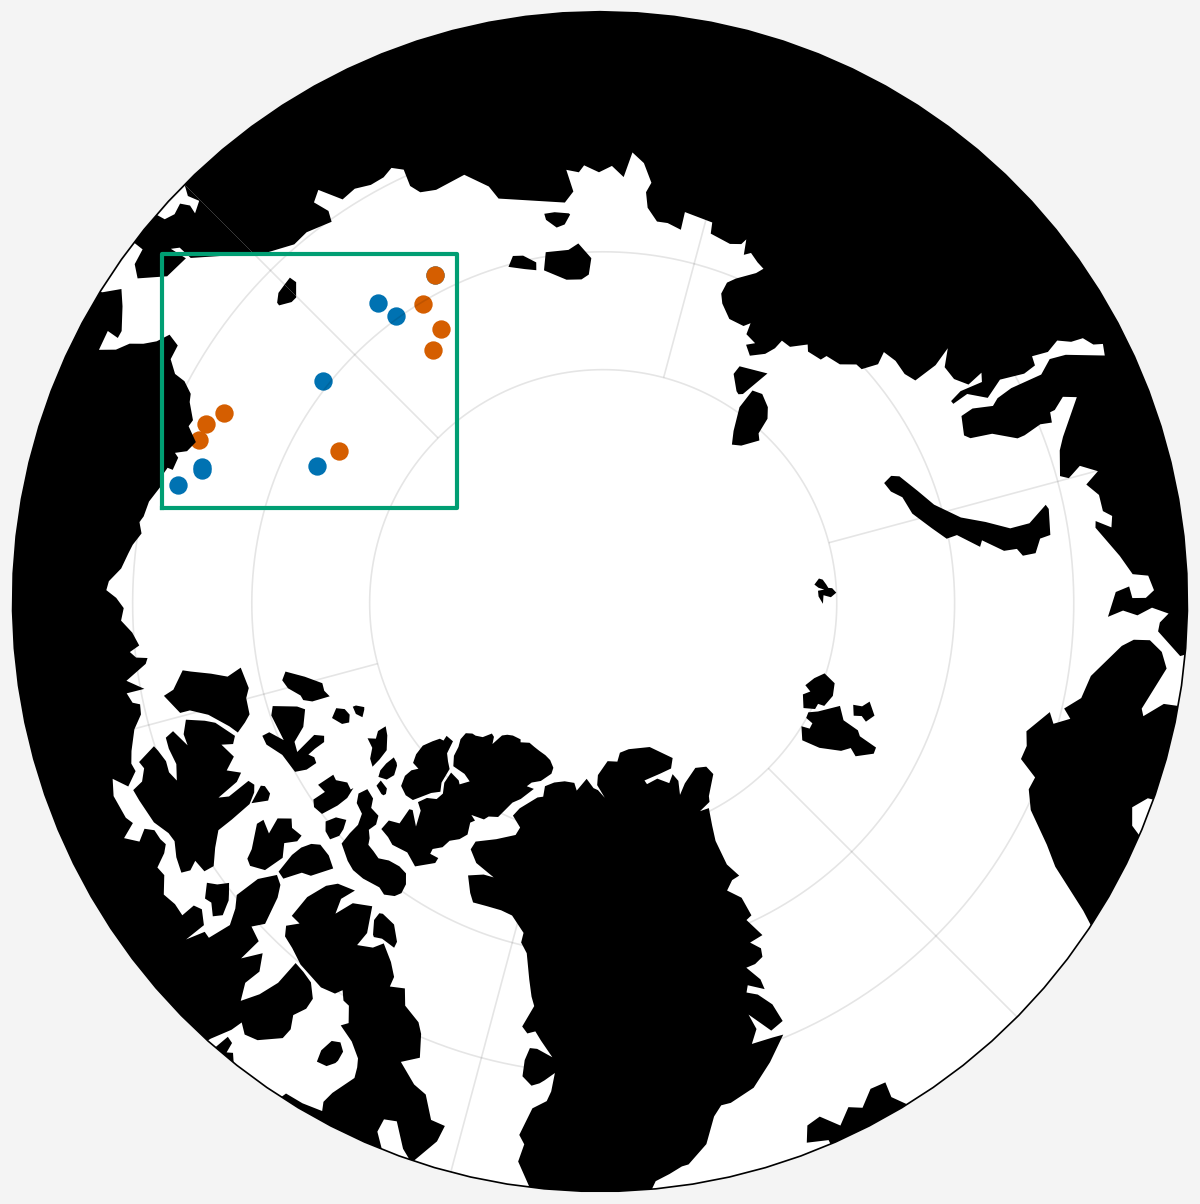

In [39]:
import cartopy.crs as ccrs
fig, ax = pplt.subplots(proj='npstere', width=6, proj_kw={'lon_0': -45, 'true_scale_latitude': 70})
ax.format(land=True, boundinglat=65)
ax.scatter(df_subset.Start_Lon.values, df_subset.Start_Lat.values, transform=ccrs.PlateCarree())
ax.scatter(df_subset.End_Lon.values, df_subset.End_Lat.values, transform=ccrs.PlateCarree())

ax.plot([left, left, right, right, left], [bottom, top, top, bottom, bottom], transform=ccrs.NorthPolarStereo(central_longitude=-45, true_scale_latitude=70))
# ax.plot(lon0, lat0,  transform=ccrs.PlateCarree(), marker='*', ms=15, c='r')

In [37]:
import numpy as np
case = pd.DataFrame({
    'fullname': 'iabp_comp1',
    'case_number': '001',
    'location': 'beaufort_sea',
    'dx': str(np.round((right-left)/1e3,0)) + 'km',
    'left_x': left,
    'right_x': right,
    'lower_y': bottom,
    'top_y': top,
    'center_x': 0.5*(left + right),
    'center_y': 0.5*(bottom + top),
    'center_lat': lat0,
    'center_lon': lon0,
    'startdate': '2015-07-01',
    'enddate': '2015-07-31'}, index=[0])

case.to_csv('../data/iabp_comp1.csv')


In [38]:
case

,fullname,case_number,location,dx,left_x,right_x,lower_y,top_y,center_x,center_y,center_lat,center_lon,startdate,enddate
0,iabp_comp1,001,beaufort_sea,1369.0km,-2.049844e+06,-680474.070491,444714.370402,1.625508e+06,-1.365159e+06,1.035111e+06,74.280177,-172.170678,2015-07-01,2015-07-31
